In [1]:
import numpy as np
import math

## 回路分割 (3qubit)

$I, X, Y, Z$生成

In [2]:
I = np.eye(2)
X = np.array([[0+0j,1+0j], [1+0j,0]])
Y = np.array([[0, 0-1j], [0+1j, 0]])
Z = np.array([[1,0], [0,-1]])

$\rho_1$生成

$$\rho_1(M) = tr_2(M_2U|0\rangle\langle0|^{\otimes 2}U^\dagger)$$

In [3]:
def rho_1(M, U):
    _input = np.kron(np.array([[1],[0]]).dot(np.array([[1,0]])),np.array([[1],[0]]).dot(np.array([[1,0]])))
    M_2 = np.kron(I, M)
    rho_12 = M_2.dot(U).dot(_input).dot(np.conjugate(U).T)
    rho = np.array([[0+0.j,0+0.j], [0+0.j,0+0.j]])
    rho[0,0], rho[0,1], rho[1,0], rho[1,1] = (rho_12[0,0] + rho_12[1,1]), (rho_12[0,2] + rho_12[1,3]), (rho_12[2,0] + rho_12[3,1]), (rho_12[2,2] + rho_12[3,3]) 
    return rho

$\rho_2$生成

$$\rho_2(M) = V(M\otimes |0\rangle\langle 0|)V^\dagger$$

In [4]:
def rho_2(M,V):
    _input = np.kron(M, np.array([[1],[0]]).dot(np.array([[1,0]])))
    return V.dot(_input).dot(np.conjugate(V).T)

$$\rho = \frac{1}{2}\sum_{M\in B} \rho_1(M)\otimes \rho_2(M)$$

In [36]:
rho_tot = (np.kron(rho_1(I,U), rho_2(I, V)) + np.kron(rho_1(X,U), rho_2(X, V)) + np.kron(rho_1(Y,U), rho_2(Y, V)) + 
           np.kron(rho_1(Z,U), rho_2(Z, V)))/2

### 回路分割で得られた$\rho$

In [37]:
array_to_latex(rho_tot, pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

### 中間出力

In [93]:
array_to_latex(rho_1(X,U), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

In [94]:
array_to_latex(rho_1(Y,U), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

In [95]:
array_to_latex(rho_1(Z,U), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

In [96]:
array_to_latex(rho_1(I,U), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

In [97]:
array_to_latex(rho_2(X,V), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

In [98]:
array_to_latex(rho_2(Y,V), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

In [99]:
array_to_latex(rho_2(Z,V), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

In [100]:
array_to_latex(rho_2(I,V), pretext="\\text{density_matrix = }")

<IPython.core.display.Math object>

## GHZ回路

In [7]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

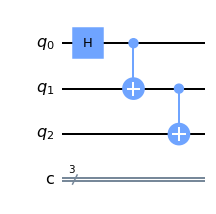

In [8]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.draw("mpl")

In [141]:
"""
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")
"""

'\nusim = Aer.get_backend(\'unitary_simulator\')\nqobj = assemble(qc)\nunitary = usim.run(qobj).result().get_unitary()\n# In Jupyter Notebooks we can display this nicely using Latex.\n# If not using Jupyter Notebooks you may need to remove the \n# array_to_latex function and use print(unitary) instead.\nfrom qiskit_textbook.tools import array_to_latex\narray_to_latex(unitary, pretext="\\text{Circuit = }\n")\n'

### 回路全体で計算した$\rho$

In [10]:
# Let's get the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(np.outer(final_state,np.array([final_state]).T), pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

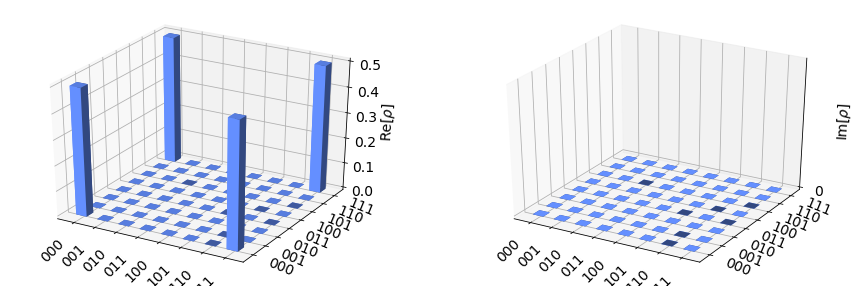

In [11]:
from qiskit.visualization import plot_state_city
plot_state_city(final_state)

### GHZ回路、U、V生成

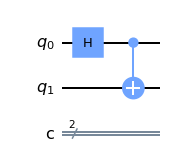

In [12]:
qc_1 = QuantumCircuit(2,2)
qc_1.h(0)
qc_1.cx(0,1)
qc_1.draw("mpl")

In [23]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc_1)
U = usim.run(qobj).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(U, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

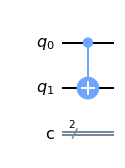

In [14]:
qc_2 = QuantumCircuit(2,2)
qc_2.cx(0,1)
qc_2.draw("mpl")

In [22]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc_2)
V = usim.run(qobj).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(V, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

## U

In [34]:
H = np.array([[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2), -1/math.sqrt(2)]])
I = np.eye(2)
U = V.dot(np.kron(H,I))
array_to_latex(U)

<IPython.core.display.Math object>

## V

In [35]:
V = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

In [31]:
V

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

## テスト

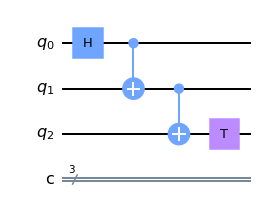

In [184]:
qc = QuantumCircuit(3,3)
qc.h(0)
## qc.h(1)
qc.cx(0,1)
qc.cx(1,2)
qc.t(2)
qc.draw("mpl")

In [185]:
# Let's get the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(np.outer(final_state,np.array([final_state]).T), pretext="\\text{Density_metrix = }")

<IPython.core.display.Math object>

In [186]:
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

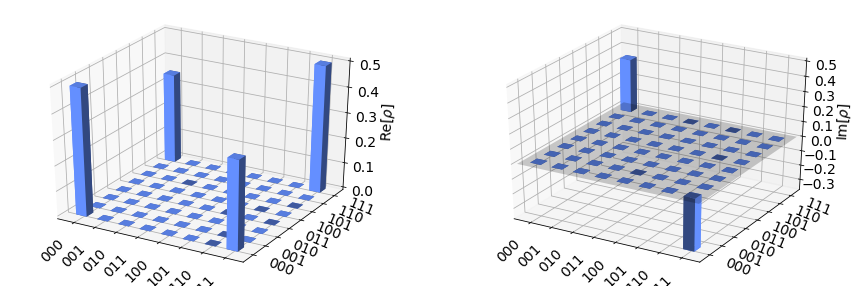

In [189]:
from qiskit.visualization import plot_state_city
plot_state_city(final_state)

qiskitの仕様により、回路を反転

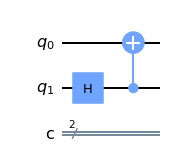

In [190]:
qc_U = QuantumCircuit(2,2)
## qc_U.h(0)
qc_U.h(1)
qc_U.cx(1,0)
qc_U.draw("mpl")

In [191]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc_U)
U = usim.run(qobj).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(U, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

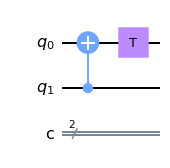

In [192]:
qc_V = QuantumCircuit(2,2)
qc_V.cx(1,0)
qc_V.t(0)
qc_V.draw("mpl")

In [193]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc_V)
V = usim.run(qobj).result().get_unitary()
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(V, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [194]:
rho_tot = ((np.kron(rho_1(I,U), rho_2(I, V)) + np.kron(rho_1(X,U), rho_2(X, V)) + np.kron(rho_1(Y,U), rho_2(Y, V)) + 
           np.kron(rho_1(Z,U), rho_2(Z, V))))/2

In [195]:
array_to_latex(rho_tot, pretext="\\text{Density_metrix = }\n")

<IPython.core.display.Math object>

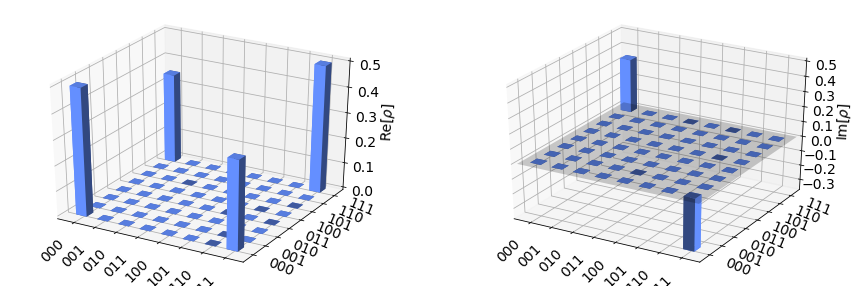

In [196]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_tot)

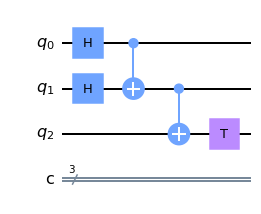

In [197]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.cx(1,2)
qc.t(2)
qc.draw("mpl")

In [198]:
# Let's get the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(np.outer(final_state,np.array([final_state]).T), pretext="\\text{Density_metrix = }")

<IPython.core.display.Math object>

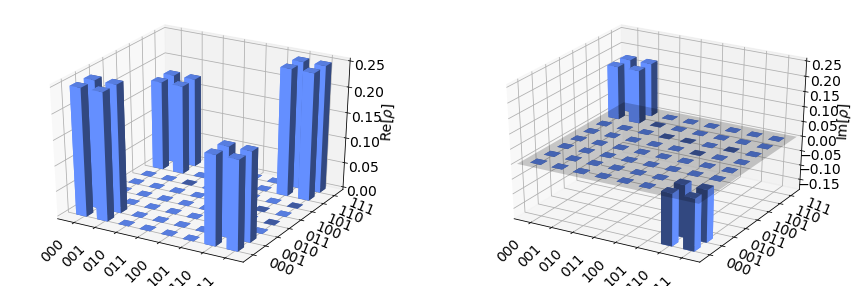

In [199]:
from qiskit.visualization import plot_state_city
plot_state_city(final_state)

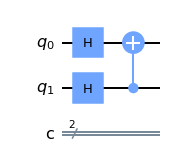

In [200]:
qc_U = QuantumCircuit(2,2)
qc_U.h(0)
qc_U.h(1)
qc_U.cx(1,0)
qc_U.draw("mpl")

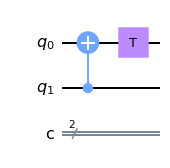

In [201]:
qc_V = QuantumCircuit(2,2)
qc_V.cx(1,0)
qc_V.t(0)
qc_V.draw("mpl")

In [202]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc_U)
U = usim.run(qobj).result().get_unitary()

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc_V)
V = usim.run(qobj).result().get_unitary()

In [203]:
rho_tot = ((np.kron(rho_1(I,U), rho_2(I, V)) + np.kron(rho_1(X,U), rho_2(X, V)) + np.kron(rho_1(Y,U), rho_2(Y, V)) + 
           np.kron(rho_1(Z,U), rho_2(Z, V))))/2

array_to_latex(rho_tot, pretext="\\text{Density_metrix = }\n")

<IPython.core.display.Math object>

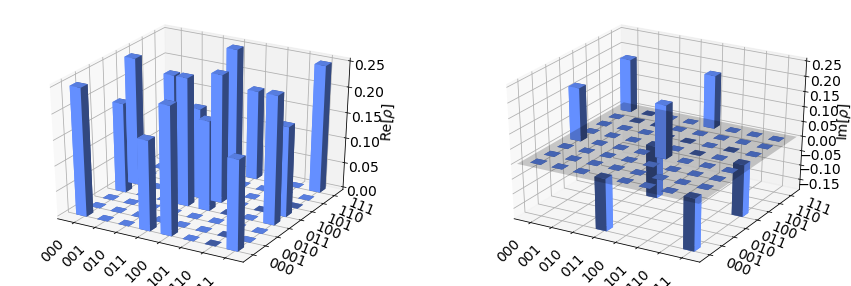

In [204]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_tot)